# Fertilizer Recommendation Data Analysis

## Importing necessary libraries

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder

In [21]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

## Dataset loading

In [3]:
fertilizer = pd.read_csv('Dataset/Fertilizer Prediction.csv')

In [4]:
fertilizer.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


## Dataset Structure Information

In [5]:
fertilizer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [6]:
fertilizer.shape

(99, 9)

In [7]:
fertilizer.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [11]:
fertilizers = len(fertilizer['Fertilizer Name'].unique())
print("Number of various crops", fertilizers)
fertilizer['Fertilizer Name'].unique()

Number of various crops 7


array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

## Fertilizer Distribution Visualization

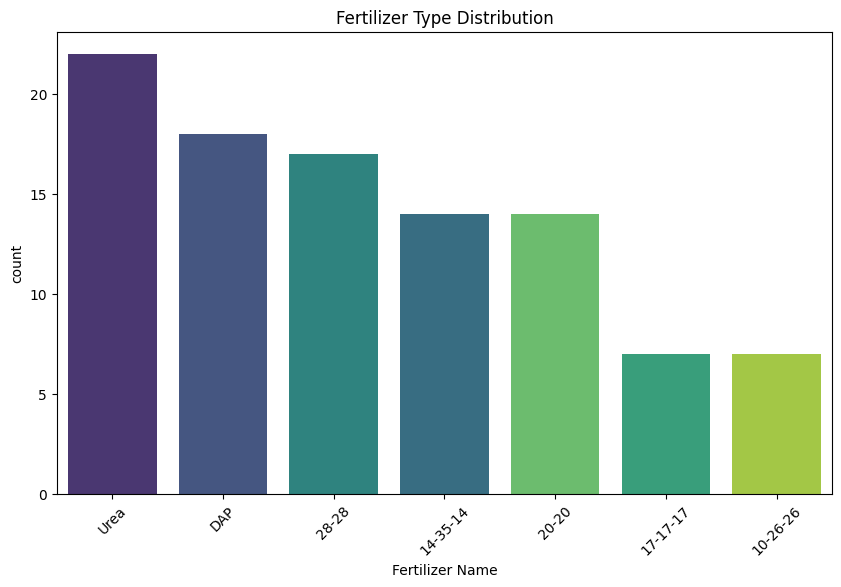

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(
    x='Fertilizer Name',
    data=fertilizer,
    order=fertilizer['Fertilizer Name'].value_counts().index,
    palette='viridis',
    hue='Fertilizer Name',
    legend=False  # Disable legend if unnecessary
)
plt.xticks(rotation=45)
plt.title('Fertilizer Type Distribution')
plt.show()

In [15]:
fertilizer['Fertilizer Name'].value_counts()

Fertilizer Name
Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: count, dtype: int64

## Data Preprocessing

In [16]:
encoder = LabelEncoder()

columns = ['Soil Type', 'Crop Type']
fertilizer[columns] = fertilizer[columns].apply(encoder.fit_transform)

In [17]:
fertilizer.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,3,37,0,0,Urea
1,29,52,45,2,8,12,0,36,DAP
2,34,65,62,0,1,7,9,30,14-35-14
3,32,62,34,3,9,22,0,20,28-28
4,28,54,46,1,6,35,0,0,Urea


In [18]:
fertilizer_names = {index : label for index, label in enumerate(encoder.classes_)}

fertilizer_names

{0: 'Barley',
 1: 'Cotton',
 2: 'Ground Nuts',
 3: 'Maize',
 4: 'Millets',
 5: 'Oil seeds',
 6: 'Paddy',
 7: 'Pulses',
 8: 'Sugarcane',
 9: 'Tobacco',
 10: 'Wheat'}

In [19]:
fertilizer_summary = pd.pivot_table(fertilizer,index=['Fertilizer Name'],aggfunc='mean')
fertilizer_summary.head()

,Crop Type,Humidity,Moisture,Nitrogen,Phosphorous,Potassium,Soil Type,Temparature
Fertilizer Name,,,,,,,,
10-26-26,6.857143,58.142857,39.285714,7.571429,17.714286,17.714286,2.142857,29.714286
14-35-14,4.571429,61.142857,45.214286,8.214286,29.571429,8.571429,1.857143,31.357143
17-17-17,4.285714,57.571429,47.142857,12.142857,13.142857,13.000000,2.571429,29.000000
20-20,6.071429,57.571429,45.285714,11.214286,11.571429,0.000000,1.714286,29.142857
28-28,5.294118,58.117647,41.941176,22.647059,21.058824,0.000000,2.352941,29.529412


## Data Visualization and Analysis of Fertilizers

### Nitrogen, Phosphorous, Potassium values comparision between fertilizers

In [23]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=fertilizer_summary.index,
    y=fertilizer_summary['Nitrogen'],
    name='Nitrogen',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=fertilizer_summary.index,
    y=fertilizer_summary['Phosphorous'],
    name='Phosphorous',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=fertilizer_summary.index,
    y=fertilizer_summary['Potassium'],
    name='Potassium',
    marker_color='crimson'
))

fig.update_layout(title="Nitrogen, Phosphorous, Potassium values comparision between Fertilizers",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show()

### Scatter plot for fertilizers based on temperature and humidity

In [24]:
fertilizer_scatter = fertilizer[(fertilizer['Fertilizer Name']=='Urea') | 
                      (fertilizer['Fertilizer Name']=='DAP') | 
                      (fertilizer['Fertilizer Name']=='14-35-14') |
                     (fertilizer['Fertilizer Name']=='28-28') |
                     (fertilizer['Fertilizer Name']=='17-17-17') | 
                      (fertilizer['Fertilizer Name']=='20-20') | 
                      (fertilizer['Fertilizer Name']=='10-26-26') ]

fig = px.scatter(fertilizer_scatter, x="Temparature", y="Humidity ", color="Fertilizer Name", symbol="Fertilizer Name")
fig.update_layout(plot_bgcolor='white')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Comparision between Temperature, Humidity, Moisture, Soil Type and Crop Type

In [25]:
fig = px.bar(fertilizer_summary, x=fertilizer_summary.index, y=["Temparature", "Humidity ", "Moisture", "Soil Type", "Crop Type"])
fig.update_layout(title_text="Comparison between Temperature, Humidity, Moisture, Soil Type, and Crop type",
                  plot_bgcolor='white',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Correlation between different features

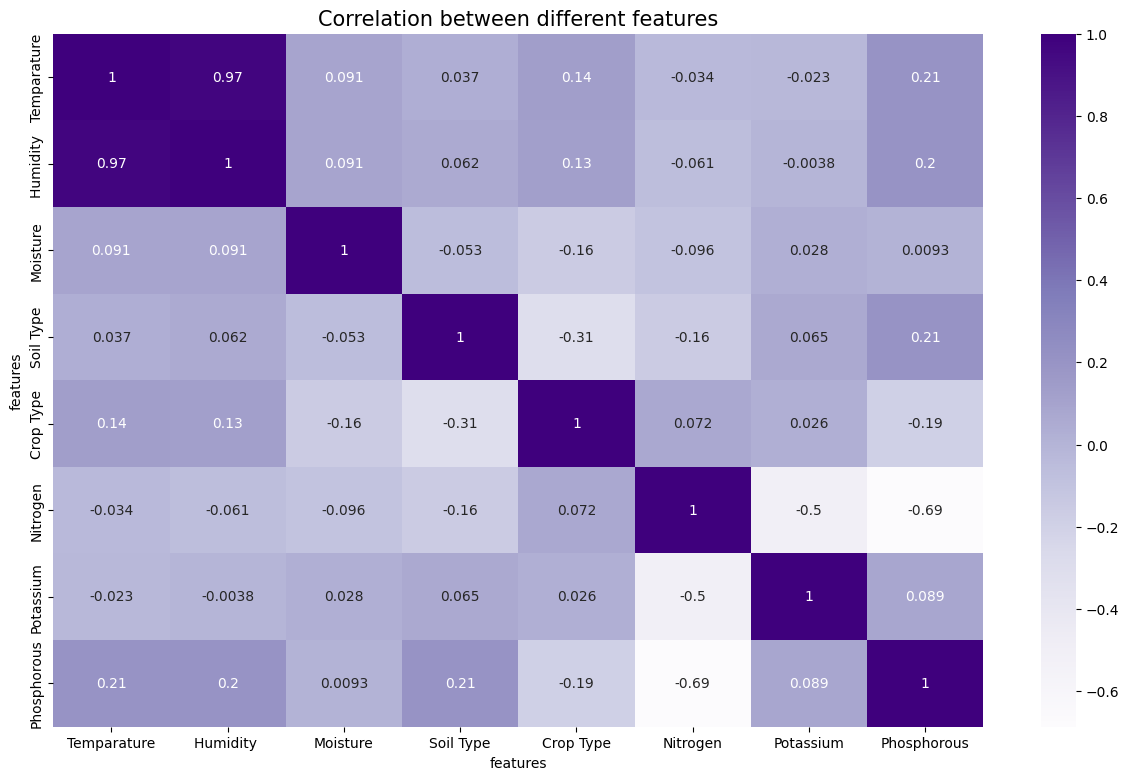

In [26]:
# Select only numeric columns
numeric_data_1 = fertilizer.select_dtypes(include=['number'])

fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(numeric_data_1.corr(), annot=True,cmap='Purples')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()